# **Predict Vehicle Prices using Vehicle Dataset**

# ***Objective***

Build a machine learning system that can predict vehicle prices using information such as specifications, manufacturer details, and technical features.
You will explore the dataset to understand its structure, analyze its features, and develop an appropriate prediction model.

# ***Dataset Description***

This dataset contains information on various vehicles, including their specifications, appearance, mechanical details, and prices.

Below is a detailed description of each column:

## **Column Descriptions**

In [ ]:
•  name
The full name of the vehicle, including make, model, and trim.
•  description
A brief description of the vehicle, often including key features and selling points.
•  make
The manufacturer of the vehicle (e.g., Ford, Toyota, BMW).
•  model
The model name of the vehicle.
•  year
The year the vehicle was manufactured.
•  price
The price of the vehicle in USD.
•  engine
Details about the engine, including type and specifications.
•  cylinders
The number of cylinders in the vehicle's engine.
•  fuel
The type of fuel used by the vehicle (e.g., Gasoline, Diesel, Electric).
•  mileage
The mileage of the vehicle, typically measured in miles.
•  transmission
The type of transmission (e.g., Automatic, Manual).
•  trim
The trim level of the vehicle, indicating different feature sets or packages.
•  body
The body style of the vehicle (e.g., SUV, Sedan, Pickup Truck).
•  doors
The number of doors on the vehicle.
•  exterior_color
The exterior color of the vehicle.
•  interior_color
The interior color of the vehicle.
•  drivetrain
The drivetrain of the vehicle (e.g., All-wheel Drive, Front-wheel Drive).



In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings

warnings.filterwarnings("ignore")
np.random.seed(42)

# Your dataset path
file_path = "dataset.csv"

print("Loading dataset from:", file_path)

Loading dataset from: dataset.csv


In [20]:
df = pd.read_csv(file_path)
print("Dataset loaded. Shape:", df.shape)

df.head()


Dataset loaded. Shape: (1002, 17)


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [23]:
print("Dataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            978 non-null    object 
 1   description     922 non-null    object 
 2   make            978 non-null    object 
 3   model           978 non-null    object 
 4   year            978 non-null    int64  
 5   price           978 non-null    float64
 6   engine          976 non-null    object 
 7   cylinders       876 non-null    float64
 8   fuel            971 non-null    object 
 9   mileage         944 non-null    float64
 10  transmission    976 non-null    object 
 11  trim            977 non-null    object 
 12  body            975 non-null    object 
 13  doors           971 non-null    float64
 14  exterior_color  973 non-null    object 
 15  interior_color  941 non-null    object 
 16  drivetrain      978 non-null    object 
dtypes: float64(4), int64(1), 

In [24]:
print("Missing Values:")
display(df.isnull().sum().sort_values(ascending=False))


Missing Values:


cylinders         102
description        56
interior_color     37
mileage            34
fuel                7
doors               7
exterior_color      5
body                3
engine              2
transmission        2
trim                1
name                0
year                0
price               0
make                0
model               0
drivetrain          0
dtype: int64

In [44]:
numeric_cols = ["price", "year", "mileage", "cylinders"]

existing_numeric = [c for c in numeric_cols if c in df.columns]

df[existing_numeric].describe()


,price,year,mileage,cylinders
count,978.000000,978.000000,944.000000,876.000000
mean,50254.317996,2023.916155,67.404661,4.976027
std,18640.823226,0.298623,511.107283,1.394068
min,17994.000000,2023.000000,0.000000,0.000000
25%,36633.500000,2024.000000,4.000000,4.000000
50%,47170.000000,2024.000000,8.000000,4.000000
75%,58924.750000,2024.000000,13.000000,6.000000
max,195895.000000,2025.000000,9711.000000,8.000000


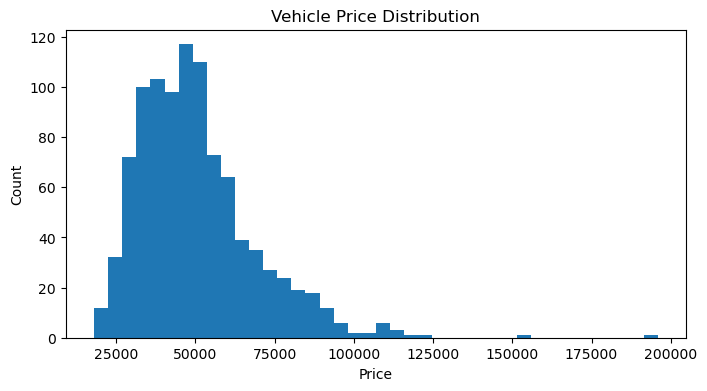

In [45]:
plt.figure(figsize=(8,4))
plt.hist(df["price"].dropna(), bins=40)
plt.title("Vehicle Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


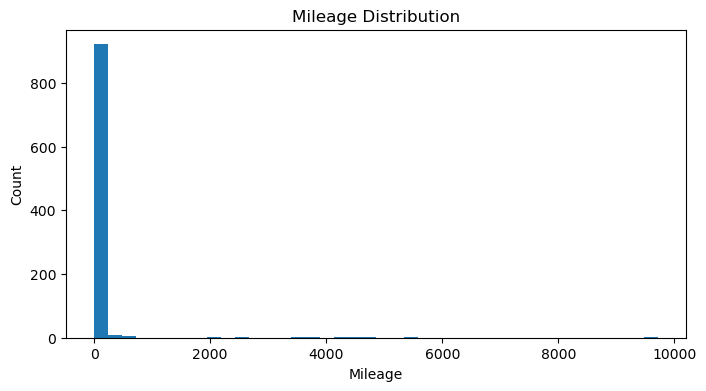

In [46]:
plt.figure(figsize=(8,4))
plt.hist(df["mileage"].dropna(), bins=40)
plt.title("Mileage Distribution")
plt.xlabel("Mileage")
plt.ylabel("Count")
plt.show()


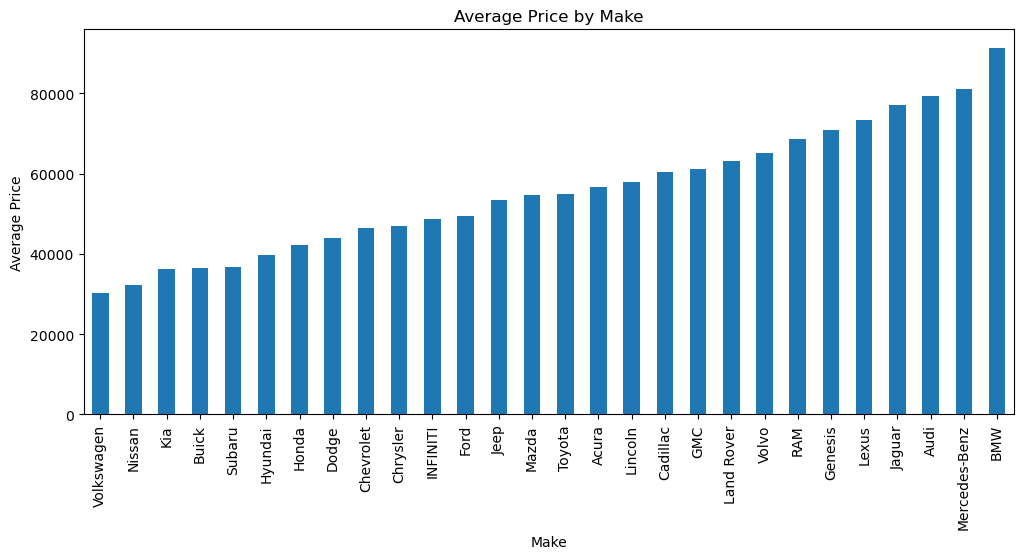

In [50]:
plt.figure(figsize=(12,5))
df.groupby("make")["price"].mean().sort_values().plot(kind="bar")
plt.title("Average Price by Make")
plt.xlabel("Make")
plt.ylabel("Average Price")
plt.show()


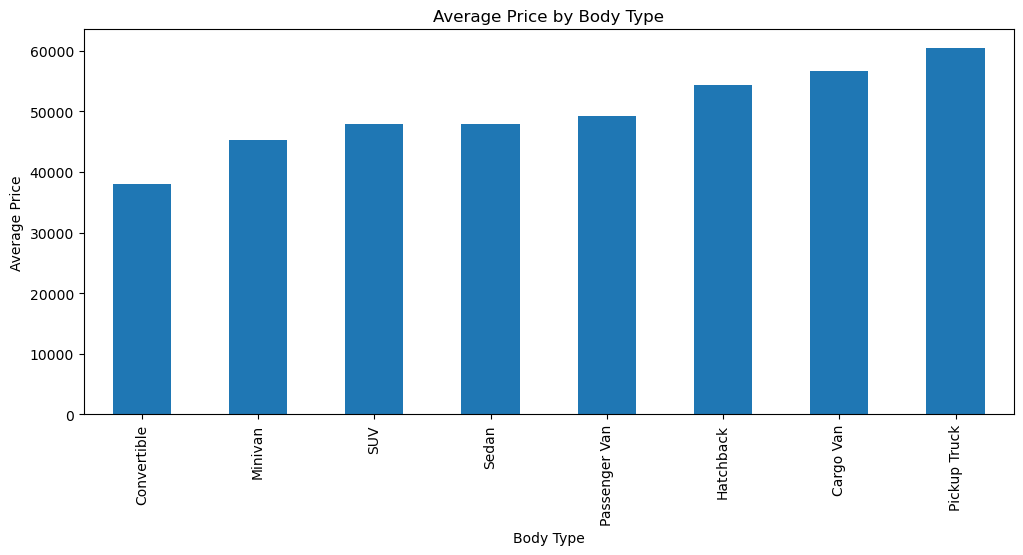

In [51]:
plt.figure(figsize=(12,5))
df.groupby("body")["price"].mean().sort_values().plot(kind="bar")
plt.title("Average Price by Body Type")
plt.xlabel("Body Type")
plt.ylabel("Average Price")
plt.show()


In [43]:
print(df.columns.tolist())


['name', 'description', 'make', 'model', 'year', 'price', 'engine', 'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors', 'exterior_color', 'interior_color', 'drivetrain']


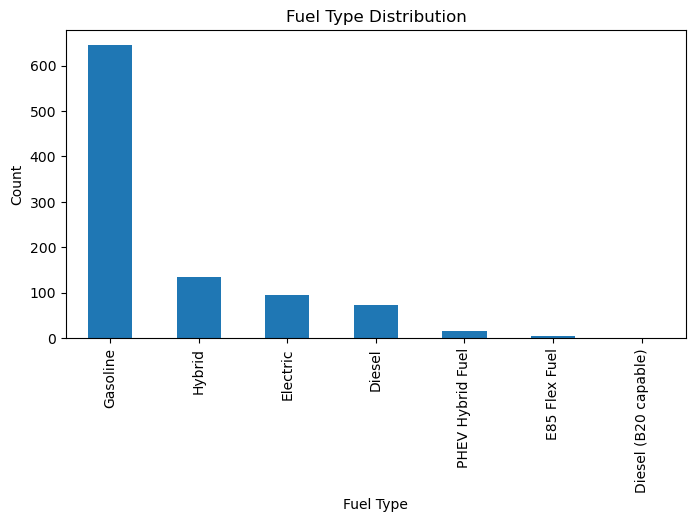

In [52]:
plt.figure(figsize=(8,4))
df["fuel"].value_counts().plot(kind="bar")
plt.title("Fuel Type Distribution")
plt.xlabel("Fuel Type")
plt.ylabel("Count")
plt.show()


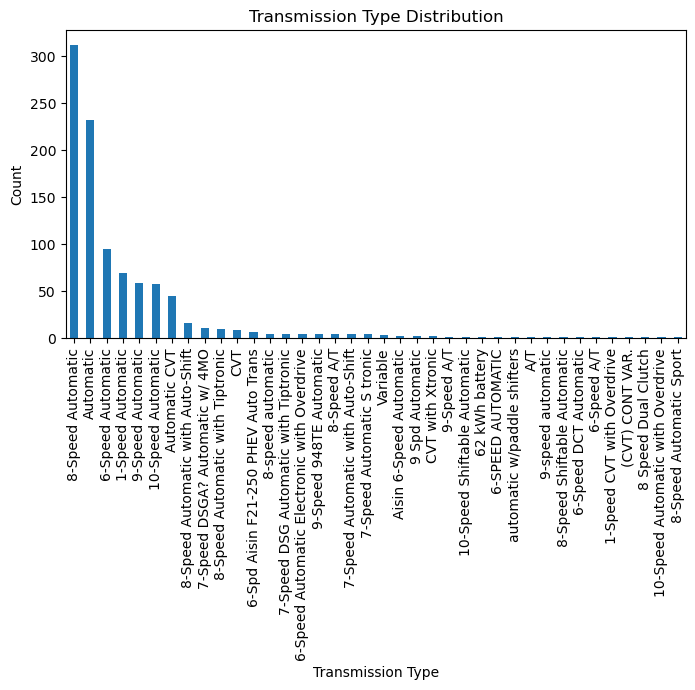

In [53]:
plt.figure(figsize=(8,4))
df["transmission"].value_counts().plot(kind="bar")
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()


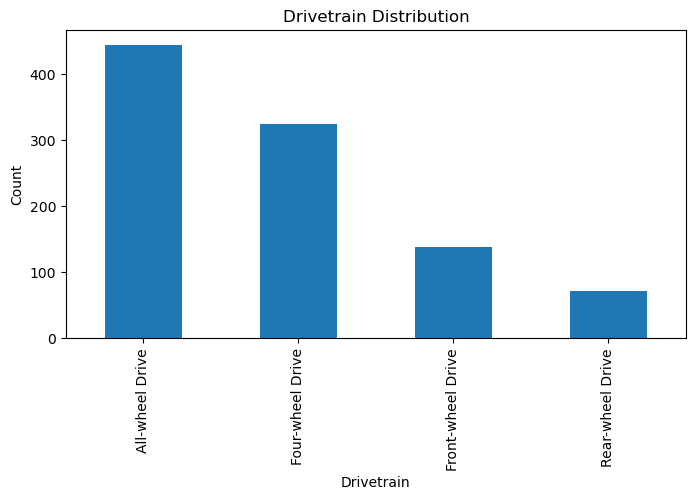

In [54]:
plt.figure(figsize=(8,4))
df["drivetrain"].value_counts().plot(kind="bar")
plt.title("Drivetrain Distribution")
plt.xlabel("Drivetrain")
plt.ylabel("Count")
plt.show()


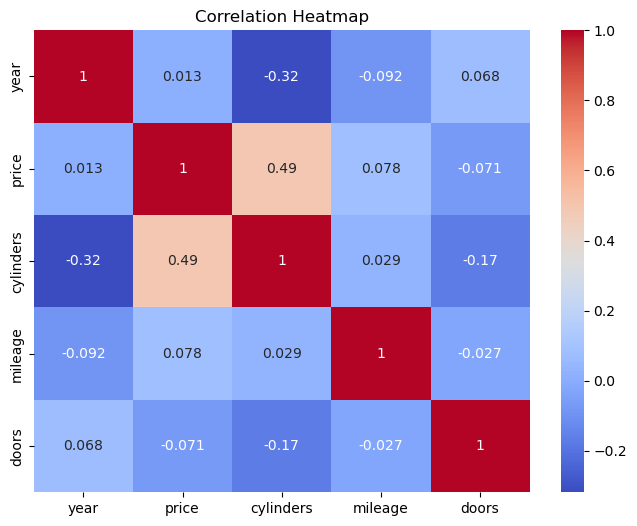

In [57]:
import seaborn as sns

num_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [58]:
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")
df.head()


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [59]:
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df = df[df["price"] > 0]
df.head()


,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [60]:
features = [
    "make", "model", "year", "mileage", "fuel", "cylinders",
    "transmission", "body", "doors", "drivetrain", "engine"
]

existing = [f for f in features if f in df.columns]
existing


['make',
 'model',
 'year',
 'mileage',
 'fuel',
 'cylinders',
 'transmission',
 'body',
 'doors',
 'drivetrain',
 'engine']

In [61]:
target = "price"

X = df[existing].copy()
y = df[target].copy()

print("Using features:", existing)


Using features: ['make', 'model', 'year', 'mileage', 'fuel', 'cylinders', 'transmission', 'body', 'doors', 'drivetrain', 'engine']


In [62]:
from datetime import datetime
import numpy as np


In [63]:
current_year = datetime.now().year

if "year" in X.columns:
    X["age"] = current_year - pd.to_numeric(X["year"], errors="coerce")

X.head()


,make,model,year,mileage,fuel,cylinders,transmission,body,doors,drivetrain,engine,age
0,Jeep,Wagoneer,2024,10.0,Gasoline,6.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,24V GDI DOHC Twin Turbo,1
1,Jeep,Grand Cherokee,2024,1.0,Gasoline,6.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,OHV,1
2,GMC,Yukon XL,2024,0.0,Gasoline,8.0,Automatic,SUV,4.0,Four-wheel Drive,"6.2L V-8 gasoline direct injection, variable v...",1
3,Dodge,Durango,2023,32.0,Gasoline,8.0,8-Speed Automatic,SUV,4.0,All-wheel Drive,16V MPFI OHV,2
4,RAM,3500,2024,10.0,Diesel,6.0,6-Speed Automatic,Pickup Truck,4.0,Four-wheel Drive,24V DDI OHV Turbo Diesel,1


In [64]:
if "mileage" in X.columns:
    X["mileage"] = (
        X["mileage"].astype(str)
        .str.replace(",", "")
        .str.extract(r"(\d+\.?\d*)")[0]
    )
    X["mileage"] = pd.to_numeric(X["mileage"], errors="coerce")

X.head()


,make,model,year,mileage,fuel,cylinders,transmission,body,doors,drivetrain,engine,age
0,Jeep,Wagoneer,2024,10.0,Gasoline,6.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,24V GDI DOHC Twin Turbo,1
1,Jeep,Grand Cherokee,2024,1.0,Gasoline,6.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,OHV,1
2,GMC,Yukon XL,2024,0.0,Gasoline,8.0,Automatic,SUV,4.0,Four-wheel Drive,"6.2L V-8 gasoline direct injection, variable v...",1
3,Dodge,Durango,2023,32.0,Gasoline,8.0,8-Speed Automatic,SUV,4.0,All-wheel Drive,16V MPFI OHV,2
4,RAM,3500,2024,10.0,Diesel,6.0,6-Speed Automatic,Pickup Truck,4.0,Four-wheel Drive,24V DDI OHV Turbo Diesel,1


In [65]:
def extract_liters(val):
    import re
    if pd.isna(val):
        return np.nan
    m = re.search(r"(\d+\.\d+|\d+)l", str(val).lower())
    return float(m.group(1)) if m else np.nan


In [66]:
if "engine" in X.columns:
    X["engine_l"] = X["engine"].apply(extract_liters)

X.head()


,make,model,year,mileage,fuel,cylinders,transmission,body,doors,drivetrain,engine,age,engine_l
0,Jeep,Wagoneer,2024,10.0,Gasoline,6.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,24V GDI DOHC Twin Turbo,1,NaN
1,Jeep,Grand Cherokee,2024,1.0,Gasoline,6.0,8-Speed Automatic,SUV,4.0,Four-wheel Drive,OHV,1,NaN
2,GMC,Yukon XL,2024,0.0,Gasoline,8.0,Automatic,SUV,4.0,Four-wheel Drive,"6.2L V-8 gasoline direct injection, variable v...",1,6.2
3,Dodge,Durango,2023,32.0,Gasoline,8.0,8-Speed Automatic,SUV,4.0,All-wheel Drive,16V MPFI OHV,2,NaN
4,RAM,3500,2024,10.0,Diesel,6.0,6-Speed Automatic,Pickup Truck,4.0,Four-wheel Drive,24V DDI OHV Turbo Diesel,1,NaN


In [67]:
#TRAIN /TEST/SPLIT
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)


Train: (782, 13) Test: (196, 13)


In [68]:
#Import Preprocessing Tools
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [69]:
categorical = X_train.select_dtypes(include="object").columns.tolist()
numeric = X_train.select_dtypes(include=[np.number]).columns.tolist()

categorical, numeric


(['make', 'model', 'fuel', 'transmission', 'body', 'drivetrain', 'engine'],
 ['year', 'mileage', 'cylinders', 'doors', 'age', 'engine_l'])

In [70]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [71]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])


In [72]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric),
        ("cat", categorical_transformer, categorical),
    ]
)


In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [74]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=300, random_state=42))
])


In [75]:
#TRAIN MODEL
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['year', 'mileage',
                                                   'cylinders', 'doors', 'age',
                                                   'engine_l']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['make', 'model', 'fuel',
                                                   'transmission', 'body',
                                                   'drivetrain', 'engine'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=300, random_state=42))])

In [76]:
pred = model.predict(X_test)

print("R2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))


R2: 0.8253152480599821
MAE: 5048.417845930395
RMSE: 7944.692714378778


In [77]:
import joblib

joblib.dump(model, "vehicle_price_model.joblib")
print("Model saved as vehicle_price_model.joblib")


Model saved as vehicle_price_model.joblib


In [78]:
new_car = pd.DataFrame([{
    "make": "Toyota",
    "model": "Camry",
    "year": 2022,
    "mileage": 15000,
    "fuel": "Gasoline",
    "cylinders": 4,
    "transmission": "8-Speed Automatic",
    "body": "Sedan",
    "doors": 4,
    "drivetrain": "Front-wheel Drive",
    "engine": "2.5L"
}])
new_car


,make,model,year,mileage,fuel,cylinders,transmission,body,doors,drivetrain,engine
0,Toyota,Camry,2022,15000,Gasoline,4,8-Speed Automatic,Sedan,4,Front-wheel Drive,2.5L


In [79]:
new_car["age"] = current_year - new_car["year"]
new_car["engine_l"] = new_car["engine"].apply(extract_liters)
new_car


,make,model,year,mileage,fuel,cylinders,transmission,body,doors,drivetrain,engine,age,engine_l
0,Toyota,Camry,2022,15000,Gasoline,4,8-Speed Automatic,Sedan,4,Front-wheel Drive,2.5L,3,2.5


In [80]:
price = model.predict(new_car)
print("Predicted price:", int(price[0]))


Predicted price: 31027
